<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/Compare_Return_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=a3ad7e68c5bbc3215411053e4fe296c1bbfa7da5ef757e7e606cf16e94994e4c
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
#Parameters - Tickers and Years for comparing return distributions

parmtickers = ['^GSPC', 'BTC-USD']
parmstart = '2020-01-01'
parmend = '2020-12-31'

In [3]:
# Get stock data from Yahoo Finance

def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [4]:
# Get returns if stock purchased on a given date
# dataframe should contain Date and Close price for the year

def getreturns(df, buydate):
  f1 = df['Date'] == buydate
  buyprice = df.loc[f1, 'Close'].values

  f2 = df['Date'] > buydate
  return (df.loc[f2,'Close'] - buyprice)/buyprice*100

In [11]:
# Get returns for all the years i.e. if stock purchased on each day, what would be the return for the rest of the days in the year?
# Returns a dictionary of dataframes with key=year
# Buy date is Column, Sell Date is index, value is the percent return

def getallreturns(df):
  ret={}
  years = pd.unique(df.index.year)

  for year in years:
    #print(year)
    df1 = df.loc[df.index.year==year,:].reset_index()
    
    for date in df1['Date']:
      df1[date] = getreturns(df1, date)

    ret[year] = df1

    return ret

In [36]:
def PlotReturnKde(dfdict, year, lab):
  retarr = dfdict[year].iloc[:,2:].values.flatten()
  retarr = retarr[~np.isnan(retarr)]
  sns.kdeplot(np.sort(retarr), label=lab)
  #plt.xlim(-35,75)
  plt.vlines(dfdict[year].iloc[-1,2],0,0.005)
  plt.legend()

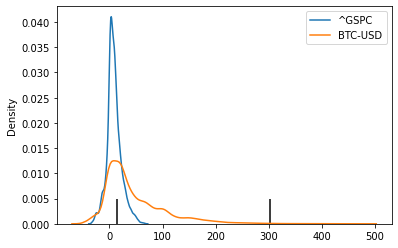

In [37]:
#Main Section

for ticker in parmtickers:
  df = GetStockData(ticker, parmstart, parmend)
  dfdict = getallreturns(df)
  PlotReturnKde(dfdict, int(parmstart[0:4]), ticker)